In [11]:
# LSTM for international airline passengers problem with regression framing
# https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('./input/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back), return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100


2023-01-10 16:31:07.196281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-10 16:31:07.304750: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-10 16:31:07.376776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


94/94 - 2s - loss: 0.0447 - 2s/epoch - 16ms/step
Epoch 2/100
94/94 - 1s - loss: 0.0215 - 572ms/epoch - 6ms/step
Epoch 3/100
94/94 - 1s - loss: 0.0166 - 527ms/epoch - 6ms/step
Epoch 4/100
94/94 - 1s - loss: 0.0152 - 510ms/epoch - 5ms/step
Epoch 5/100
94/94 - 1s - loss: 0.0141 - 670ms/epoch - 7ms/step
Epoch 6/100
94/94 - 1s - loss: 0.0127 - 580ms/epoch - 6ms/step
Epoch 7/100
94/94 - 1s - loss: 0.0115 - 578ms/epoch - 6ms/step
Epoch 8/100
94/94 - 1s - loss: 0.0103 - 522ms/epoch - 6ms/step
Epoch 9/100
94/94 - 1s - loss: 0.0093 - 521ms/epoch - 6ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0081 - 473ms/epoch - 5ms/step
Epoch 11/100
94/94 - 1s - loss: 0.0071 - 533ms/epoch - 6ms/step
Epoch 12/100
94/94 - 1s - loss: 0.0061 - 637ms/epoch - 7ms/step
Epoch 13/100
94/94 - 2s - loss: 0.0052 - 2s/epoch - 20ms/step
Epoch 14/100
94/94 - 1s - loss: 0.0045 - 968ms/epoch - 10ms/step
Epoch 15/100
94/94 - 1s - loss: 0.0038 - 690ms/epoch - 7ms/step
Epoch 16/100
94/94 - 1s - loss: 0.0034 - 592ms/epoch - 6ms/step


2/2 [==============================] - 0s 5ms/step
Train Score: 22.65 RMSE
Test Score: 49.34 RMSE


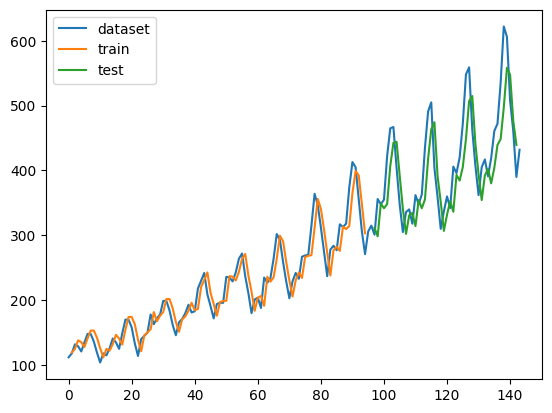

<Figure size 5000x1500 with 0 Axes>

In [13]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
itrainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
itestY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(itrainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(itestY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
scale = range(len(dataset))
plt.plot(scaler.inverse_transform(dataset), label="dataset")
plt.plot(range(len(trainPredictPlot)), trainPredictPlot, label="train")
plt.plot(range(len(testPredictPlot)), testPredictPlot, label="test")
plt.legend()
fig = plt.figure(figsize=(50, 15))


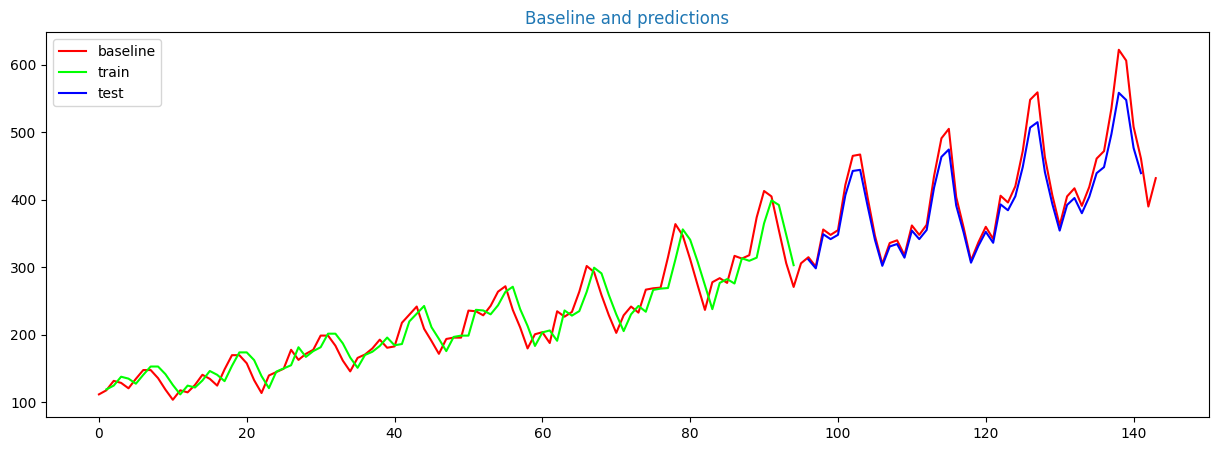

In [27]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back : len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+look_back+1 : len(dataset)-look_back-1, :] = testPredict

# plot baseline and predictions
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title("Baseline and predictions", color='C0')
ax.plot(scaler.inverse_transform(dataset), color="#f00" , label="baseline")
ax.plot(range(len(trainPredictPlot)), trainPredictPlot, color="#0f0", label="train")
plt.plot(range(len(testPredictPlot)), testPredictPlot, color="#00f", label="test")
plt.legend()
